In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset

# Image Path

In [3]:
Base_path = "/content/drive/MyDrive/SmartVisionAI/smartvision_dataset/classification"
Splits = ["train", "val", "test"]
subset_dir   = "/content/drive/MyDrive/SmartVisionAI/smartvision_dataset/classification_subset"


In [4]:
# import os
# import shutil
# import random

# original_dir = Base_path
# subset_dir   = "/content/drive/MyDrive/SmartVisionAI/smartvision_dataset/classification_subset" # new folder for 150/25/25 per class

# splits = ["train", "val", "test"]
# limits = {"train": 150, "val": 25, "test": 25}


# for split in splits:
#     for cls in os.listdir(os.path.join(original_dir, split)):
#         os.makedirs(os.path.join(subset_dir, split, cls), exist_ok=True)

# for split in splits:
#     for cls in os.listdir(os.path.join(original_dir, split)):
#         class_path = os.path.join(original_dir, split, cls)
#         images = [img for img in os.listdir(class_path) if img.endswith(".jpg") or img.endswith(".png")]
#         random.shuffle(images)

#         limit = limits[split]
#         selected_images = images[:limit]

#         for img in selected_images:
#             shutil.copy(os.path.join(class_path, img),
#                         os.path.join(subset_dir, split, cls))

# print("Subset dataset created successfully with 150/25/25 images per class!")


In [5]:
train_dir=os.path.join(subset_dir, "train")
val_dir=os.path.join(subset_dir, "val")
test_dir=os.path.join(subset_dir, "test")

# Class Count

In [6]:
for split in Splits:
    split_path = os.path.join(subset_dir, split)

    classes = sorted([
        cls for cls in os.listdir(split_path)
        if os.path.isdir(os.path.join(split_path, cls))
    ])

    print(f"{split.upper()} -> {len(classes)} classes")


TRAIN -> 26 classes
VAL -> 26 classes
TEST -> 26 classes


# Image Count

In [7]:
per_class_limit = {
    "train": 150,
    "val": 25,
    "test": 25
}

data = []

for split in Splits:
    split_path = os.path.join(Base_path, split)
    limit = per_class_limit[split]

    for cls_entry in os.scandir(split_path):
        if not cls_entry.is_dir():
            continue

        cls = cls_entry.name
        cls_path = cls_entry.path

        # FAST: list only file names
        images = [
            entry.name
            for entry in os.scandir(cls_path)
            if entry.is_file()
        ]

        # Take only required number (no full shuffle)
        selected_images = random.sample(images, limit)

        for img in selected_images:
            data.append({
                "Split": split,
                "Class": cls,
                "Image_path": os.path.join(cls_path, img)
            })


In [8]:
import pandas as pd

df_counts = pd.DataFrame(data)

df_counts.head()

,Split,Class,Image_path
0,train,bicycle,/content/drive/MyDrive/SmartVisionAI/smartvisi...
1,train,bicycle,/content/drive/MyDrive/SmartVisionAI/smartvisi...
2,train,bicycle,/content/drive/MyDrive/SmartVisionAI/smartvisi...
3,train,bicycle,/content/drive/MyDrive/SmartVisionAI/smartvisi...
4,train,bicycle,/content/drive/MyDrive/SmartVisionAI/smartvisi...


In [9]:
df_counts['Split'].value_counts()

,count
Split,
train,3900
val,650
test,650


In [10]:
df_counts['Class'].value_counts()

,count
Class,
bicycle,200
person,200
motorcycle,200
car,200
airplane,200
bus,200
truck,200
train,200
traffic light,200


# Number Of Images per Class

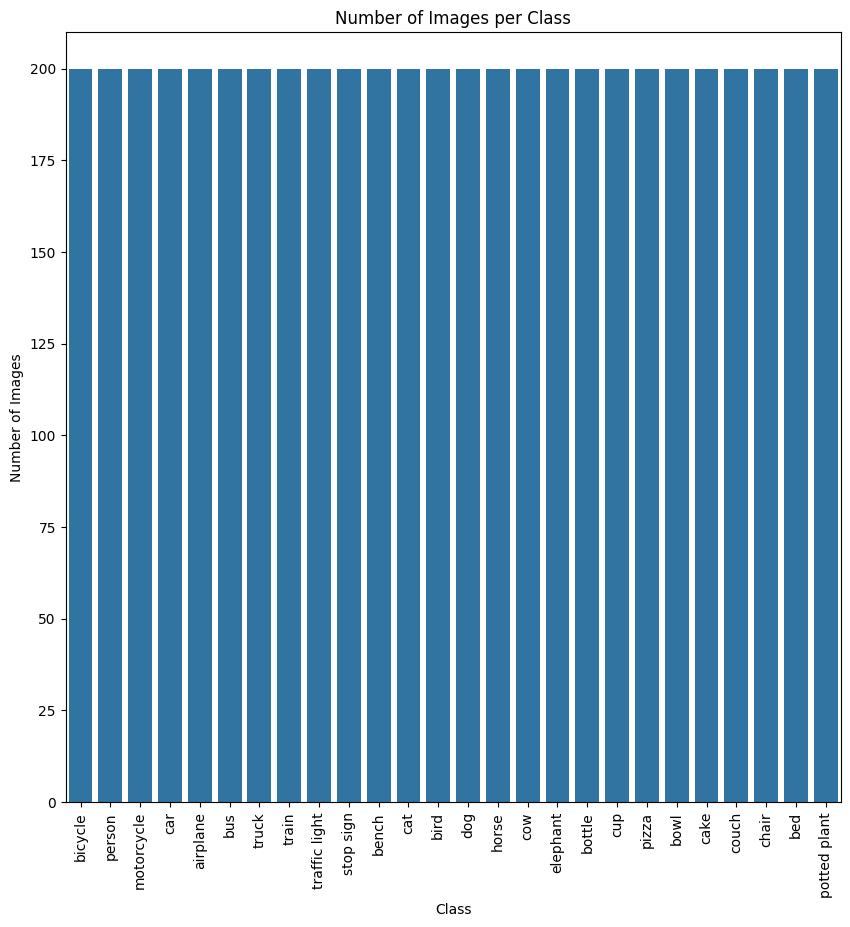

In [11]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(data=df_counts, x='Class')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.xticks(df_counts['Class'].unique(), rotation=90)
plt.ylabel('Number of Images')
plt.show()

In [12]:
pivot_df=df_counts.pivot_table(
    index='Class',
    columns='Split',
    values='Image_path',
    aggfunc='count',
    fill_value=0
)
pivot_df['Total']=pivot_df.sum(axis=1)
pivot_df=pivot_df.sort_values('Total', ascending=False)
pivot_df


Split,test,train,val,Total
Class,,,,
airplane,25,150,25,200
bed,25,150,25,200
bench,25,150,25,200
bicycle,25,150,25,200
bird,25,150,25,200
bottle,25,150,25,200
bowl,25,150,25,200
bus,25,150,25,200
cake,25,150,25,200


# Class Distribution Plot for All Splits

<Figure size 1400x800 with 0 Axes>

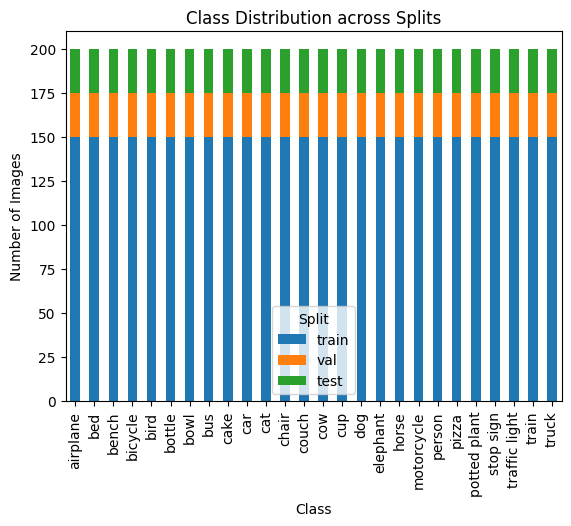

In [13]:
plt.figure(figsize=(14,8))
pivot_df[['train', 'val', 'test']].plot(kind='bar', stacked=True)
plt.title('Class Distribution across Splits')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# Class Distribution Pltot for Train

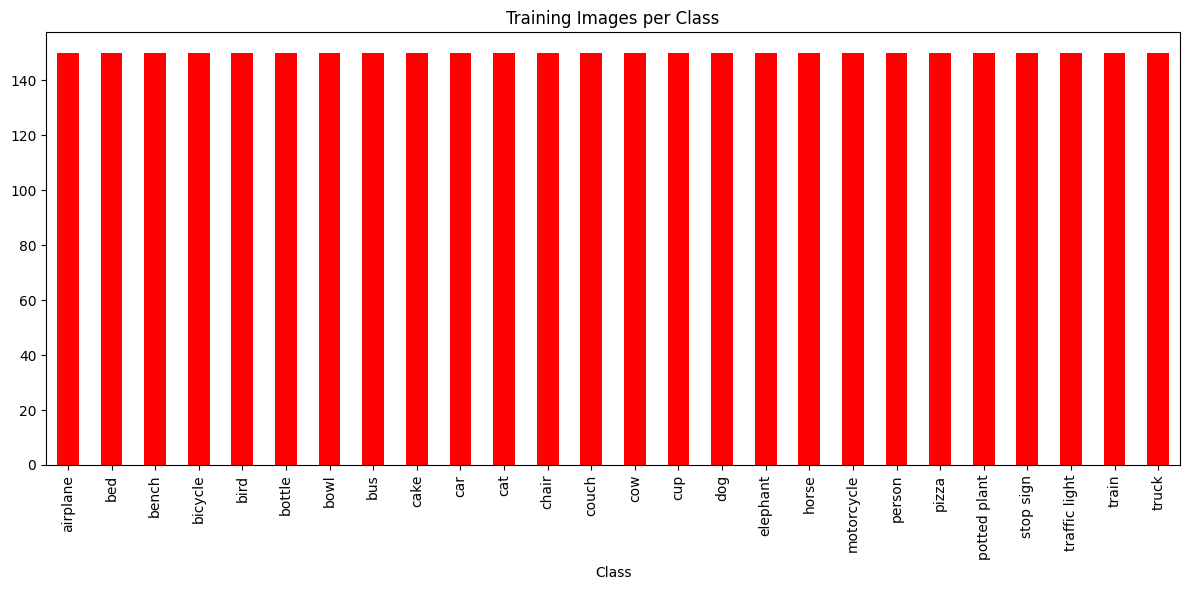

In [14]:
plt.figure(figsize=(12,6))
pivot_df['train'].plot(kind='bar',color='red')
plt.title('Training Images per Class')
plt.xlabel("Class")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Validation Images per Class

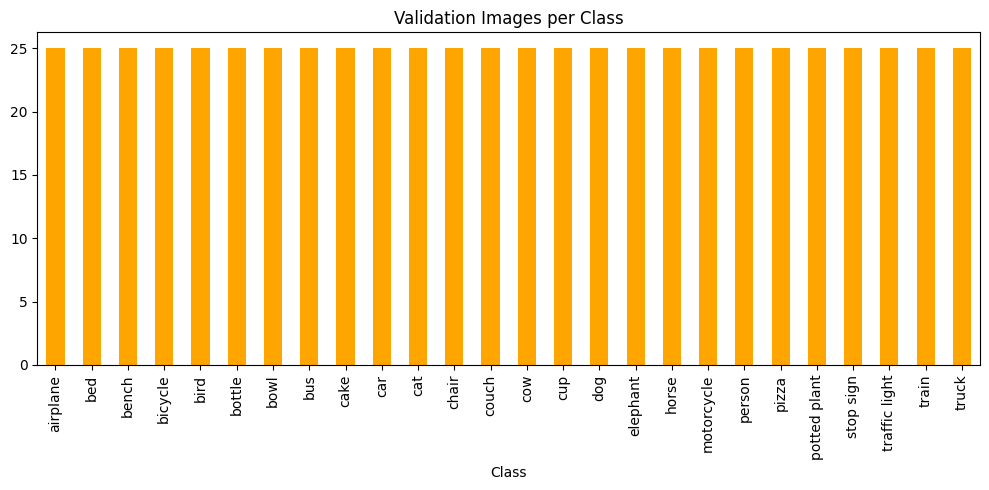

In [15]:
plt.figure(figsize=(10,5))
pivot_df['val'].plot(kind='bar', color='orange')
plt.title('Validation Images per Class')
plt.xlabel("Class")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Test Images Per Class

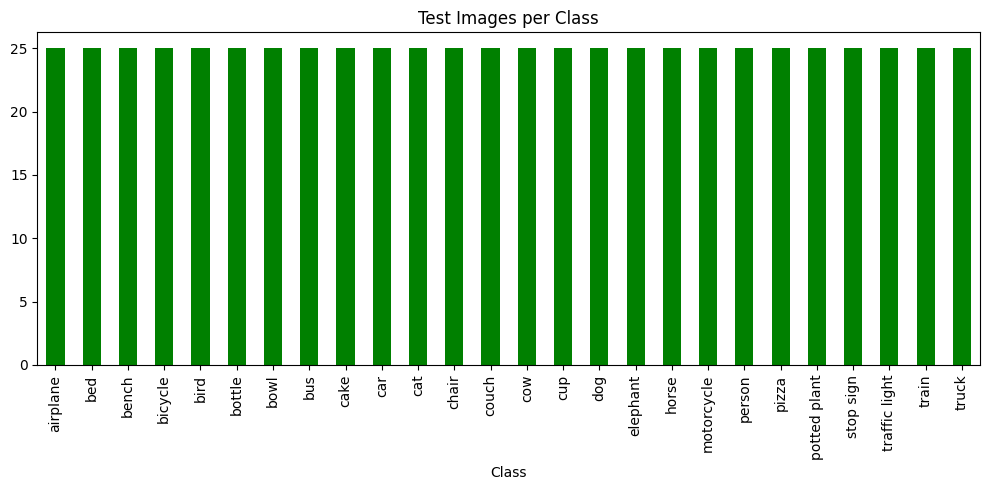

In [16]:
plt.figure(figsize=(10,5))
pivot_df['test'].plot(kind='bar', color='green')
plt.title('Test Images per Class')
plt.xlabel("Class")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Show Samples of different Images

In [17]:
def show_random_images(split="train", samples_per_class=3):
    split_path = os.path.join(Base_path, split)

    for cls in random.sample(os.listdir(split_path), 25):
        cls_path = os.path.join(split_path, cls)
        images = os.listdir(cls_path)

        plt.figure(figsize=(12, 3))
        for i, img_name in enumerate(random.sample(images, min(samples_per_class, len(images)))):
            img_path = os.path.join(cls_path, img_name)
            img = Image.open(img_path)

            plt.subplot(1, samples_per_class, i + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(cls)

        plt.show()


In [18]:
show_random_images("train")

Output hidden; open in https://colab.research.google.com to view.

# Checking the Images Size

In [19]:
# image_size=[]

# for split in Splits:
#     split_path=os.path.join(Base_path, split)
#     classes=os.listdir(split_path)
#     for cls in os.listdir(split_path):
#         cls_path=os.path.join(split_path, cls)

#         for img_name in os.listdir(cls_path):
#             if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
#                 img_path=os.path.join(cls_path, img_name)
#                 img=Image.open(img_path)
#                 w,h=img.size
#                 image_size.append({'Split':split, 'Class':cls, 'Image_name':img_name, 'Width':w, 'Height':h})



In [20]:
# size_df=pd.DataFrame(image_size, columns=['Split', 'Class', 'Image_name', 'Width', 'Height'])
# size_df.head()

In [21]:
# size_df.describe()

# Image Size Distribution

In [22]:
# plt.figure(figsize=(10,5))

# plt.subplot(1,2,1)

# plt.hist(size_df['Width'], bins=30, color='blue', alpha=0.7)
# plt.title('Distribution of Image Widths')
# plt.xlabel('Width (pixels)')
# plt.ylabel('Frequency')

# plt.subplot(1,2,2)
# plt.hist(size_df['Height'], bins=30, color='green', alpha=0.7)
# plt.title('Distribution of Image Heights')
# plt.xlabel('Height (pixels)')
# plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

In [23]:
percentage_df = pivot_df.copy()

for split in Splits:
    percentage_df[split] = (percentage_df[split] / percentage_df["Total"]) * 100

percentage_df[Splits].round(2)


Split,train,val,test
Class,,,
airplane,75.0,12.5,12.5
bed,75.0,12.5,12.5
bench,75.0,12.5,12.5
bicycle,75.0,12.5,12.5
bird,75.0,12.5,12.5
bottle,75.0,12.5,12.5
bowl,75.0,12.5,12.5
bus,75.0,12.5,12.5
cake,75.0,12.5,12.5


In [24]:
print(f"Total Images: {pivot_df['Total'].sum()}")
print(f"Total Classes: {pivot_df.shape[0]}")
print("Top 5 Classes by Image Count:")
print(pivot_df.head())


Total Images: 5200
Total Classes: 26
Top 5 Classes by Image Count:
Split     test  train  val  Total
Class                            
airplane    25    150   25    200
bed         25    150   25    200
bench       25    150   25    200
bicycle     25    150   25    200
bird        25    150   25    200


In [25]:
show_random_images('val')

Output hidden; open in https://colab.research.google.com to view.

In [26]:
show_random_images('test')

Output hidden; open in https://colab.research.google.com to view.

# Verify Images sizes

In [27]:
for cls in os.listdir(train_dir):
    cls_path = os.path.join(train_dir, cls)
    img_name = os.listdir(cls_path)[0]
    img = Image.open(os.path.join(cls_path, img_name))
    print(f"{cls}: {img.size}")


bicycle: (224, 224)
person: (224, 224)
motorcycle: (224, 224)
car: (224, 224)
airplane: (224, 224)
bus: (224, 224)
truck: (224, 224)
train: (224, 224)
traffic light: (224, 224)
stop sign: (224, 224)
bench: (224, 224)
cat: (224, 224)
bird: (224, 224)
dog: (224, 224)
horse: (224, 224)
cow: (224, 224)
elephant: (224, 224)
bottle: (224, 224)
cup: (224, 224)
pizza: (224, 224)
bowl: (224, 224)
cake: (224, 224)
couch: (224, 224)
chair: (224, 224)
bed: (224, 224)
potted plant: (224, 224)


# Data Normalization

In [28]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

BATCH_SIZE = 32

imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std  = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

val_test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

train_dataset = datasets.ImageFolder(
    root=f"{train_dir}",
    transform=train_transform
)

val_dataset = datasets.ImageFolder(
    root=f"{val_dir}",
    transform=val_test_transform
)

test_dataset = datasets.ImageFolder(
    root=f"{test_dir}",
    transform=val_test_transform
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Classes:", train_dataset.classes)
print("Number of classes:", len(train_dataset.classes))


Classes: ['airplane', 'bed', 'bench', 'bicycle', 'bird', 'bottle', 'bowl', 'bus', 'cake', 'car', 'cat', 'chair', 'couch', 'cow', 'cup', 'dog', 'elephant', 'horse', 'motorcycle', 'person', 'pizza', 'potted plant', 'stop sign', 'traffic light', 'train', 'truck']
Number of classes: 26


# Data Augmentation

In [29]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(
        brightness=0.2,
        contrast=0.2,
        saturation=0.2,
        hue=0.1
    ),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

val_test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])


# Show Augmented Images

In [30]:
def show_augmented_images(dataloader, classes, n=25):
    data_iter = iter(dataloader)
    images, labels = next(data_iter)

    n = min(n, len(images))
    images = images[:n]
    labels = labels[:n]

    mean = torch.tensor(imagenet_mean).view(3, 1, 1)
    std = torch.tensor(imagenet_std).view(3, 1, 1)
    images = images * std + mean

    cols = 5
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.flatten()

    for i in range(n):
        img = images[i].permute(1, 2, 0).numpy()
        img = np.clip(img, 0, 1)

        axes[i].imshow(img)
        axes[i].set_title(classes[labels[i]])
        axes[i].axis('off')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

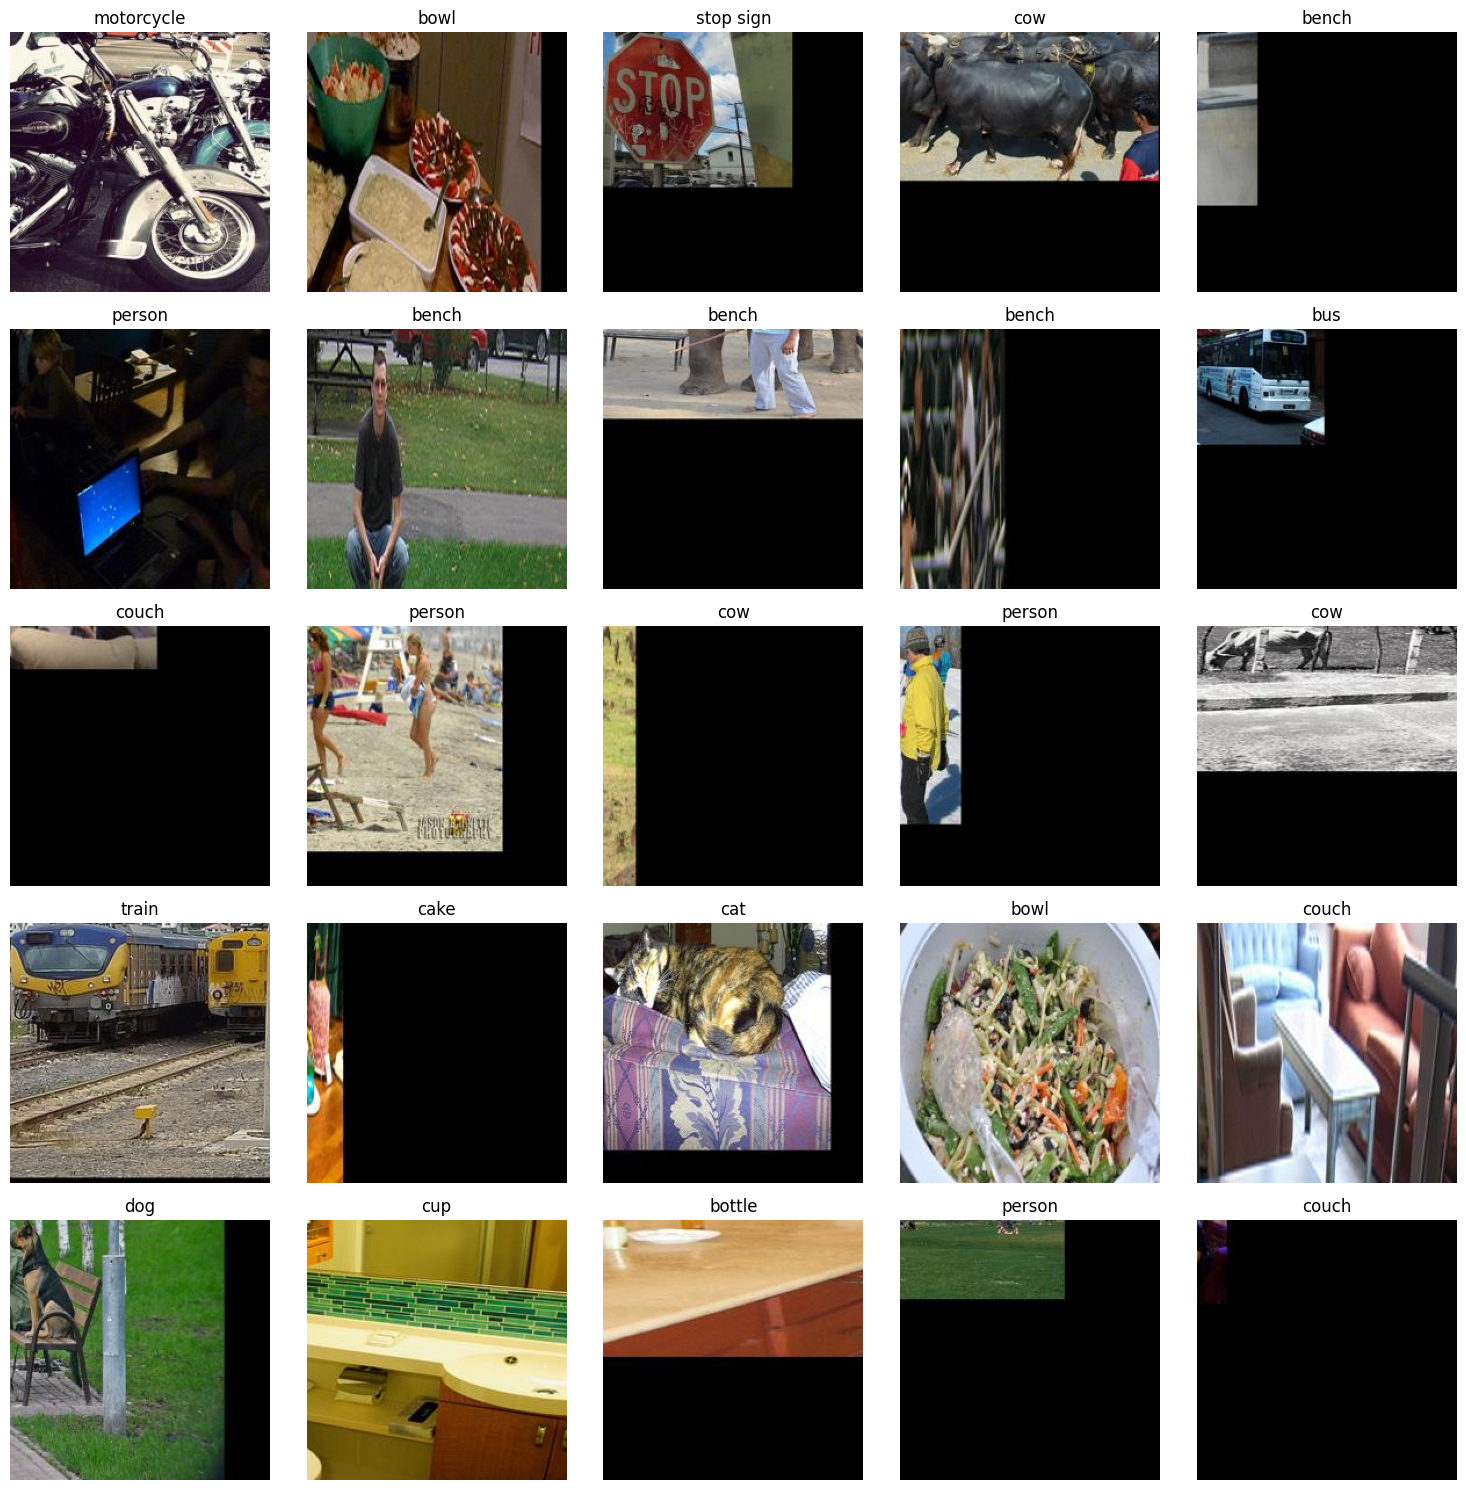

In [31]:
show_augmented_images(train_loader, train_dataset.classes)

In [32]:
images, labels = next(iter(train_loader))

print("Min pixel value:", images.min().item())
print("Max pixel value:", images.max().item())
print("Mean pixel value:", images.mean().item())
print("Std pixel value:", images.std().item())


Min pixel value: -2.1179039478302
Max pixel value: 2.640000104904175
Mean pixel value: -0.8699987530708313
Std pixel value: 1.3061699867248535


# Visualizing Normalized vs Unnormalized Images.

In [33]:
def compare_normalized_image(dataset, idx=0):
    img, label = dataset[idx]

    mean = torch.tensor(imagenet_mean).view(3,1,1)
    std  = torch.tensor(imagenet_std).view(3,1,1)
    img_unnorm = img * std + mean

    fig, ax = plt.subplots(1,2, figsize=(8,4))

    ax[0].imshow(img_unnorm.permute(1,2,0))
    ax[0].set_title("Unnormalized")
    ax[0].axis("off")

    ax[1].imshow(img.permute(1,2,0))
    ax[1].set_title("Normalized ")
    ax[1].axis("off")

    plt.show()


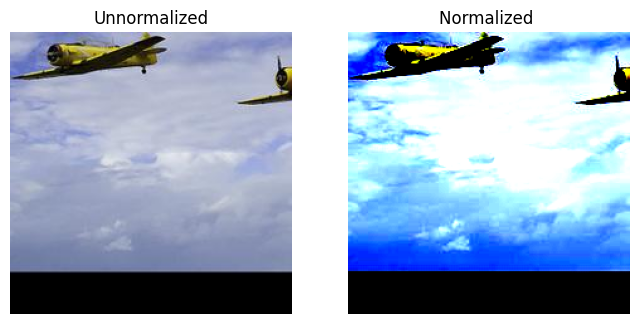

In [34]:
compare_normalized_image(train_dataset, idx=20)

# Mobile Net V2 Model

In [37]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [38]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS_STAGE1 = 15
EPOCHS_STAGE2 = 10

In [39]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

NUM_CLASSES = train_data.num_classes
print("Classes:", NUM_CLASSES)


Found 3900 images belonging to 26 classes.
Found 650 images belonging to 26 classes.
Classes: 26


In [40]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [41]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=outputs)


In [42]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,592,602 (9.89 MB)

 Trainable params: 334,618 (1.28 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [43]:
# history_stage1 = model.fit(
#     train_data,
#     validation_data=val_data,
#     epochs=15
# )


In [44]:
base_model.trainable = True

for layer in base_model.layers[:-30]:
    layer.trainable = False


In [45]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [46]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=4,
    restore_best_weights=True
)

history_stage2 = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1164s 9s/step - accuracy: 0.0958 - loss: 3.3316 - val_accuracy: 0.2708 - val_loss: 2.6339
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - accuracy: 0.3186 - loss: 2.3897 - val_accuracy: 0.4154 - val_loss: 1.9645
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 332s 3s/step - accuracy: 0.4210 - loss: 2.0097 - val_accuracy: 0.4800 - val_loss: 1.7872
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 343s 3s/step - accuracy: 0.5009 - loss: 1.7633 - val_accuracy: 0.5062 - val_loss: 1.6304
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.5435 - loss: 1.6206 - val_accuracy: 0.5508 - val_loss: 1.5591
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 403s 3s/step - accuracy: 0.5788 - loss: 1.4394 - val_accuracy: 0.5908 - val_loss: 1.4781
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.6018 - loss: 1.3676 - val_accuracy: 0.6077 - val_loss: 1.4516
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 331s 3s/step - accuracy: 0.6480 - loss: 1.2269 - val_acc

In [47]:
model.save("mobilenetv2_smartvision.keras")
print("✅ Model saved successfully")


✅ Model saved successfully


In [48]:
model.save("/content/drive/MyDrive/SmartVisionAI/mobilenetv2_smartvision.keras")
print("✅ Model saved to Google Drive")


✅ Model saved to Google Drive
